In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import geopandas as gpd
import folium

        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

<Axes: >

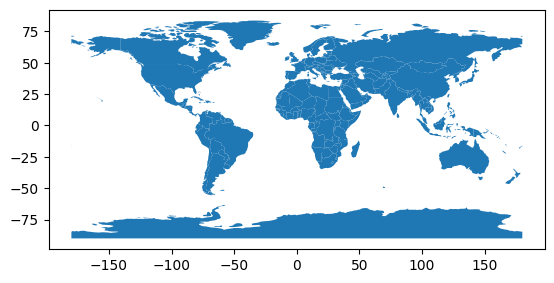

In [62]:
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

print(world.head())
world.plot

Task 2: Load NAtural Earth Dataset
Guide Question:
1. How many columns does the dataset contain?


2. What type of geometries and included?


3. What does the geometry column represent?


In [63]:
print("Current CRS:", world.crs)

Current CRS: EPSG:4326


**Task 3: Check the Coordinate Reference System**
**Guide Questions:**
1. What does EPSG:4326 represent?
2. Why is CRS important in spatial analysis?

In [64]:
world_projected = world.to_crs(epsg=3857)

world_projected["area_m2"] = world_projected.geometry.area

print(world_projected[["ADMIN", "area_m2"]].head)
print("\nArea Reprojection Complete")

<bound method NDFrame.head of                            ADMIN       area_m2
0                           Fiji  2.128334e+10
1    United Republic of Tanzania  9.522552e+11
2                 Western Sahara  1.171023e+11
3                         Canada  5.216648e+13
4       United States of America  2.186228e+13
..                           ...           ...
172           Republic of Serbia  1.488818e+11
173                   Montenegro  2.497975e+10
174                       Kosovo  2.072802e+10
175          Trinidad and Tobago  8.051555e+09
176                  South Sudan  6.399394e+11

[177 rows x 2 columns]>

Area Reprojection Complete


Task 4: Convert to Metric CRS for Area Calculation
Guide Questions:
1. Why can't we compute area accurately using EPSG:4326?
2. What unit is EPSG:3857 based on?

In [65]:
world_projected["centroid"] = world_projected.geometry.centroid
world_projected["x"] = world_projected.centroid.x
world_projected["y"] = world_projected.centroid.y

print(world_projected[["ADMIN", "x", "y"]].head)

<bound method NDFrame.head of                            ADMIN             x             y
0                           Fiji  1.824878e+07 -1.958098e+06
1    United Republic of Tanzania  3.869296e+06 -7.003071e+05
2                 Western Sahara -1.348403e+06  2.794163e+06
3                         Canada -1.079779e+07  1.044422e+07
4       United States of America -1.329713e+07  6.667416e+06
..                           ...           ...           ...
172           Republic of Serbia  2.316658e+06  5.505001e+06
173                   Montenegro  2.146954e+06  5.280332e+06
174                       Kosovo  2.326059e+06  5.248463e+06
175          Trinidad and Tobago -6.827259e+06  1.167359e+06
176                  South Sudan  3.361521e+06  8.153257e+05

[177 rows x 3 columns]>


Task 5: Exract Centroid Coordinates
Guide Questions:
1. What is a centroid?
2. What can centroid coordinates be used in clustering?
3. Why do we extract X and Y separately?

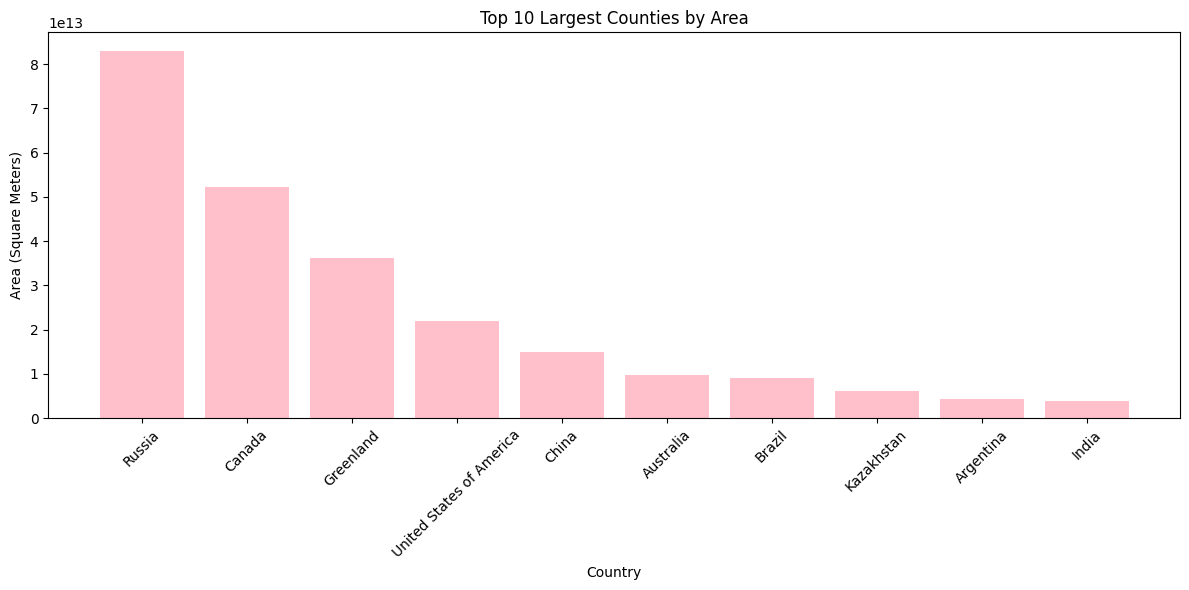

In [66]:
world_no_antarctica = world_projected.query("ADMIN != 'Antarctica'")
top_10_countries = world_no_antarctica.nlargest(10, "area_m2")

plt.figure(figsize=(12, 6))
plt.bar(top_10_countries['ADMIN'], top_10_countries['area_m2'], color='pink')
plt.title('Top 10 Largest Counties by Area')
plt.xlabel('Country')
plt.ylabel('Area (Square Meters)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

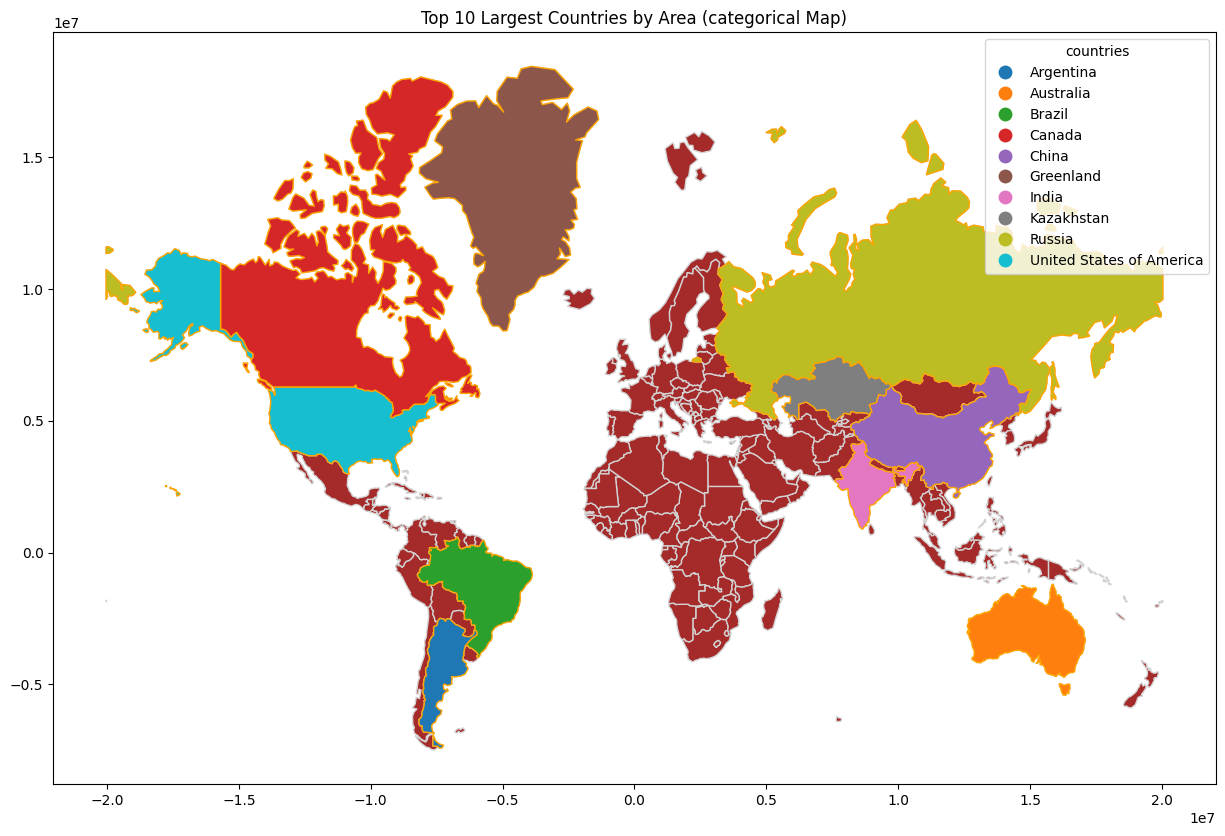

In [67]:
ax = world_no_antarctica.plot(figsize=(15, 10), color='brown', edgecolor='lightgrey')

top_10_countries.plot(
    ax=ax,
    column='ADMIN',
    legend=True,
    categorical=True,
    cmap='tab10',
    edgecolor='orange',
    legend_kwds={'title': 'countries', 'bbox_to_anchor': (1, 1)}
)

plt.title('Top 10 Largest Countries by Area (categorical Map)')
plt.show()